<a href="https://colab.research.google.com/github/zapata-git/Tasas-de-suicidio-de-1985-a-2016/blob/main/ProyectoIA_Suicidios_1985_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tasas de suicidio de 1985 a 2016**
*El conjunto de datos **"Suicide Rates Overview 1985 to 2016"** recopila información sobre tasas de suicidio a nivel mundial, con el objetivo de encontrar correlaciones con tasas de suicidio más altas en diferentes cohortes a lo largo del tiempo*



---




#Descripción detallada de este conjunto de datos:

- **Columnas:** El conjunto de datos consta de 12 columnas, que incluyen la información siguiente:
- **País:** El país en el que se registraron los datos.
- **Año:** El año en el que se recopilaron los datos.
- **Sexo:** El género (masculino o femenino).
- **Grupo de Edad:** La edad de las personas, dividida en grupos (por ejemplo, 15-24 años, 35-54 años, etc.).
- **Recuento de Suicidios:** La cantidad de suicidios registrados.
-**Población**: La población total en ese grupo demográfico.
- **Tasa de Suicidios:** La tasa de suicidios por cada 100,000 habitantes.
- **Clave Compuesta País-Año:** Una clave que combina información sobre el país y el año.
- **IDH para el Año:** El Índice de Desarrollo Humano para ese año, que mide el desarrollo socioeconómico.
- **PIB para el Año:** El Producto Interno Bruto para ese año.
- **PIB Per Cápita:** El Producto Interno Bruto per cápita para ese año.
- **Generación:** Basado en el promedio del grupo de edad.

#Preparación de datos.
Importamos las bibliotecas necesarias y cargamos el conjunto de datos:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Mounted at /content/drive


#Instalación de Jovian y Kaggle mediante pip

* El paquete jovian se utiliza para guardar y compartir proyectos de ciencia de datos en línea.

* El paquete kaggle proporciona una API de línea de comandos para interactuar con Kaggle, una plataforma en línea para competiciones de ciencia de datos y conjuntos de datos.

In [ ]:
!pip install jovian --upgrade --quiet
!pip install -q kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import jovian

In [ ]:
#PARA EJECUTAR ESTA LÍNEA, EN EL COMPUTADOR QUE SE EJECUTE DEBE HABER UNA COPIA DEL JSON WEB TOKEN
#DESCARGABLE DESDE LA PÁGINA DE UNA CUENTA DE KAGGLE EN https://www.kaggle.com/settings/account?...
#ESTE JSON WEB TOKEN ES PERSONAL DE CADA CUENTA Y SIRVE COMO IDENTIFICADOR DE ACCESO.
#CARGUE EL JSON QUE USTED DESCARGÓ DE SU CUENTA DE KAGGLE
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"carlosozapata","key":"bf008703e346e7fee66bc2b2659a302d"}'}

#Extracción de los archivos del conjunto de datos descargados desde Kaggle

* El conjunto de datos descargado

* Los archivos quedan almacenados en el entorno de ejecución de Google Colab siempre y cuando se haya autorizado el acceso de la cuenta de Google a este. Esto se debió realizar en bloques de código anteriores.

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
#!kaggle datasets list

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
#Para descargar el conjunto de datos desde Kaggle al drive local de Google

!kaggle datasets download 'russellyates88/suicide-rates-overview-1985-to-2016'


  0% 0.00/397k [00:00<?, ?B/s]
100% 397k/397k [00:00<00:00, 82.0MB/s]


In [ ]:
import os
from zipfile import ZipFile

# Especifica el nombre del archivo .zip que deseas descomprimir
file = "suicide-rates-overview-1985-to-2016.zip"

# Abre el archivo .zip en modo lectura
with ZipFile(file, 'r') as zip:

    # Extrae todos los archivos
    print('Extracción de archivos en proceso...')
    zip.extractall()
    print('Extracción terminada')

# Cambia al directorio de trabajo deseado (en este ejemplo, cambiamos al directorio "/content/")
%cd "/content/"

# Descomprime cualquier otro archivo .zip que se encuentre en el directorio actual
for archivo in os.listdir():
  if archivo.endswith(".zip"):
    with ZipFile(archivo, 'r') as zip_ref:
      zip_ref.extractall("/content/")

# Luego de ejecutar este código, los archivos .zip se habrán descomprimido en el directorio actual.


Extracción de archivos en proceso...
Extracción terminada
/content


In [ ]:
import os

# Listar el contenido del directorio '/content/'
for item in os.listdir('/content/'):
    print(item)


.config
drive
suicide-rates-overview-1985-to-2016.zip
master.csv
sample_data


# Análisis exploratorio de datos (EDA)
En el EDA (Análisis Exploratorio de Datos) para el proyecto...

In [ ]:
import pandas as pd

# Cargar el archivo "master.csv" en un DataFrame
datos = pd.read_csv('master.csv')
print(f"Cantidad de filas en el archivo de entrenamiento:\t{datos.shape[0]}")
print(f"Cantidad de columnas en el archivo de entrenamiento:\t{datos.shape[1]}")



Cantidad de filas en el archivo de entrenamiento:	27820
Cantidad de columnas en el archivo de entrenamiento:	12


In [ ]:
#Primeras filas del conjunto de datos
datos.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


**Información general sobre el conjunto de datos**

In [ ]:
print("Resumen general del conjunto de datos:")
print(datos.info())

Resumen general del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB
None


- -El conjunto de datos proporciona información sobre suicidios en diferentes países y años.
- Contiene un total de 27,820 registros y 12 columnas.
- Las columnas incluyen información sobre el país, el año, el género, la edad, el número de suicidios, la población, la tasa de suicidios por cada 100,000 habitantes, el año y país combinados, el Índice de Desarrollo Humano (HDI, por sus siglas en inglés) para ese año, el Producto Interno Bruto (PIB) del país en ese año, el PIB per cápita y la generación a la que pertenecen los individuos. - El conjunto de datos contiene datos en diferentes formatos, como objetos, enteros y números de punto flotante.
-Cabe destacar que la columna "HDI for year" tiene valores no nulos en solo una parte de los registros, y la información se ocupa aproximadamente 2.5 MB de memoria.

**Estadísticas descriptivas para las variables numéricas**

In [ ]:
print("Estadísticas descriptivas para variables numéricas:")
print(datos.describe())

Estadísticas descriptivas para variables numéricas:
               year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year  gdp_per_capita ($)  
count   8364.000000        27820.000000  
mean       0.776601        16866.464414  
std        0.093367        18887.576472  
min        0.483000          251.000000  
25%        0.713000         3447.000000  
50%        0.779000         9372.000000  
75%        0.855000    

Las estadísticas descriptivas proporcionan un resumen de las principales características numéricas de tu conjunto de datos:

- **year:** El conjunto de datos abarca un período de 1985 a 2016, con un promedio de aproximadamente 2001.26 años. El año mínimo es 1985, y el máximo es 2016.

- **suicides_no:** La columna "suicides_no" representa el número de suicidios. La cantidad de suicidios varía significativamente, con un valor mínimo de 0 y un valor máximo de 22,338. El promedio es de aproximadamente 242.57 suicidios.

- **population:** La columna "population" refleja el tamaño de la población en los países estudiados. La población varía considerablemente, con un mínimo de alrededor de 278 personas y un máximo de aproximadamente 43.8 millones.

- **suicides/100k pop**: Esta columna muestra la tasa de suicidios por cada 100,000 habitantes. Las tasas varían desde 0 (sin suicidios) hasta un máximo de 224.97.

- **HDI for year**: La columna "HDI for year" representa el Índice de Desarrollo Humano (HDI) para cada año. Solo contiene datos para un subconjunto de registros (8,364 de 27,820). El HDI varía de 0.483 (bajo desarrollo humano) a 0.944 (alto desarrollo humano), con un promedio de aproximadamente 0.776.

- **gdp_per_capita ($)**: La columna "gdp_per_capita ($)" representa el Producto Interno Bruto (PIB) per cápita en dólares. El PIB per cápita tiene un rango amplio, con un valor mínimo de 251 dólares y un valor máximo de 126,352 dólares.

**Valores faltantes**

In [ ]:
print("Valores faltantes en el conjunto de datos:")
print(datos.isnull().sum())

Valores faltantes en el conjunto de datos:
country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


- El análisis de valores faltantes en el conjunto de datos revela que la columna "HDI for year" (Índice de Desarrollo Humano para ese año) tiene un total de 19,456 valores faltantes. El número de valores faltantes se presenta como `NaN` (Not a Number) en la columna correspondiente.

- Para las demás columnas, no se encuentran valores faltantes, ya que todas tienen un recuento de valores no nulos igual a cero.

- La presencia de valores faltantes en la columna "HDI for year" indica que no se tiene información del Índice de Desarrollo Humano para un gran número de registros en el conjunto de datos. Esto puede afectar la capacidad de análisis y modelado de datos, y se deben considerar enfoques como la imputación de valores faltantes o la exclusión de registros con valores faltantes, dependiendo de los objetivos específicos del análisis de datos.

#Llenar valores faltantes con la Mediana.
Para solucionar el problema de valores faltantes en el conjunto de datos, específicamente en la columna "HDI for year". Utilizamos la estrategia de imputación, reemplazando los valores faltantes por la mediana de la columna. Posteriormente, verificamos si los datos se llenaron correctamente al contar los valores nulos en la columna "HDI for year". Esta acción es esencial para garantizar que los valores faltantes no interfieran con nuestros análisis y modelos subsiguientes. El resultado de la verificación confirmó que los datos en la columna "HDI for year" están ahora llenados y listos para su uso en el análisis y modelado de datos.

In [ ]:
# Imputación de valores faltantes en la columna "HDI for year" con la mediana
median_hdi = datos['HDI for year'].median()
datos['HDI for year'].fillna(median_hdi, inplace=True)


In [ ]:
# Verificar si hay valores nulos en la columna "HDI for year"
valores_faltantes = datos['HDI for year'].isnull().sum()

if valores_faltantes == 0:
    print("No hay valores nulos en la columna 'HDI for year'. Los datos están llenados.")
else:
    print(f"Hay {valores_faltantes} valores nulos en la columna 'HDI for year'.")


No hay valores nulos en la columna 'HDI for year'. Los datos están llenados.


In [ ]:
print("Valores faltantes en el conjunto de datos:")
print(datos.isnull().sum())

Valores faltantes en el conjunto de datos:
country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64


#Gráfico de Dispersión
El gráfico de dispersión que muestra la relación entre el PIB per cápita y la tasa de suicidio proporciona información valiosa sobre cómo estas dos variables se relacionan entre sí. Aquí hay un análisis del gráfico:

- Distribución de PIB per Cápita: En el eje X (horizontal), tenemos el PIB per cápita, que es una medida de la riqueza económica de un país. Observamos que la mayoría de los puntos están concentrados en la parte inferior de la escala del PIB per cápita, lo que indica que la mayoría de los países tienen un PIB per cápita relativamente bajo.

- Tasa de Suicidio: En el eje Y (vertical), representamos la tasa de suicidio por cada 100,000 habitantes. En este eje, observamos una dispersión más amplia de puntos. Algunos países tienen tasas de suicidio muy bajas, mientras que otros tienen tasas más altas.

- Relación entre PIB per Cápita y Tasa de Suicidio: Al observar la distribución de puntos en el gráfico, podemos notar que no existe una relación lineal clara entre el PIB per cápita y la tasa de suicidio. En otras palabras, no se puede decir que un aumento en el PIB per cápita se traduzca automáticamente en una disminución de la tasa de suicidio, y viceversa. La relación es compleja y está influenciada por múltiples factores.

- Outliers: Observamos algunos puntos que están bastante alejados de la mayoría. Estos pueden representar países con características inusuales en términos de tasas de suicidio y PIB per cápita. Es importante identificar y comprender estos puntos atípicos, ya que podrían proporcionar información valiosa sobre factores específicos que influyen en las tasas de suicidio.

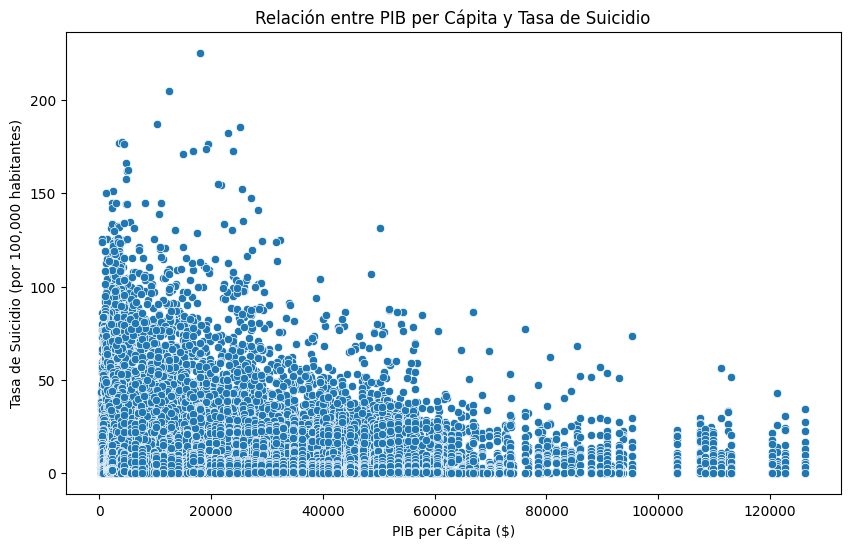

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=datos)
plt.title('Relación entre PIB per Cápita y Tasa de Suicidio')
plt.xlabel('PIB per Cápita ($)')
plt.ylabel('Tasa de Suicidio (por 100,000 habitantes)')
plt.show()


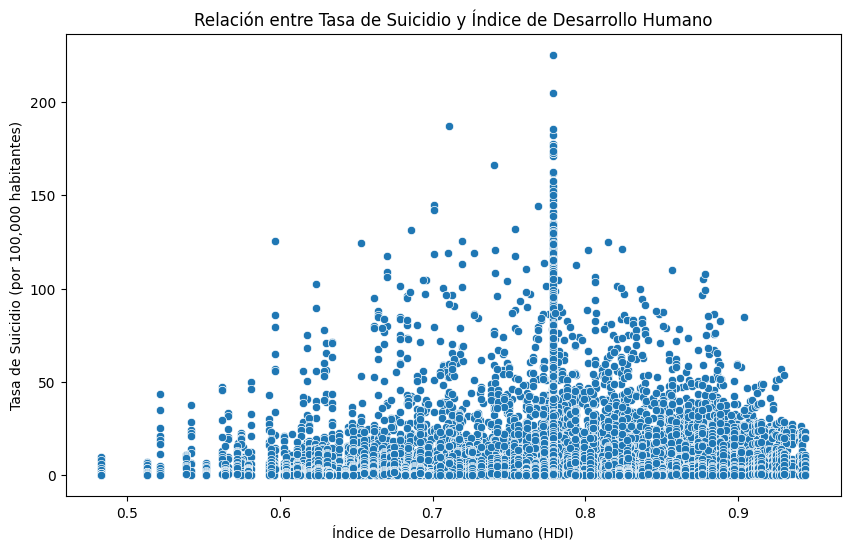

In [ ]:
Otro comparando
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de dispersión para Tasa de Suicidio vs. Índice de Desarrollo Humano (HDI)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HDI for year', y='suicides/100k pop', data=datos)
plt.title('Relación entre Tasa de Suicidio y Índice de Desarrollo Humano')
plt.xlabel('Índice de Desarrollo Humano (HDI)')
plt.ylabel('Tasa de Suicidio (por 100,000 habitantes)')
plt.show()


#Diagrama de Caja
El diagrama de caja (boxplot) que muestra la distribución de la tasa de suicidio por grupo de edad proporciona información sobre cómo las tasas de suicidio varían en diferentes grupos demográficos. Aquí hay un análisis del diagrama de caja:

- **Distribución de Tasas de Suicidio:** El diagrama de caja muestra la distribución de las tasas de suicidio en diferentes grupos de edad, representados en el eje X. Cada caja representa uno de los grupos de edad, y la altura de la caja representa la variabilidad en las tasas de suicidio dentro de ese grupo.

- **Mediana y Cuartiles:** La línea en el interior de cada caja representa la mediana de las tasas de suicidio en ese grupo de edad. La caja en sí abarca el rango intercuartil (IQR), que contiene el 50% de los datos y se extiende desde el primer cuartil (Q1) hasta el tercer cuartil (Q3). Esto proporciona información sobre la dispersión de los datos.

- **Bigotes (Whiskers):** Los bigotes (líneas verticales que se extienden desde las cajas) representan la variabilidad más allá del rango intercuartil. Los puntos que están fuera de los bigotes se consideran valores atípicos o outliers.

- **Análisis por Grupo de Edad:** Observamos que el grupo de edad "5-14 años" tiene una mediana muy baja y una caja estrecha, lo que indica tasas de suicidio consistentemente bajas en ese grupo. Por otro lado, el grupo de edad "75+ años" muestra una mediana más alta y una caja más ancha, lo que indica una mayor variabilidad en las tasas de suicidio en este grupo de edad.

- **Outliers:** Se observan valores atípicos en algunos grupos de edad, representados como puntos fuera de los bigotes. Estos valores atípicos pueden ser de interés para un análisis más detallado, ya que podrían indicar situaciones excepcionales.

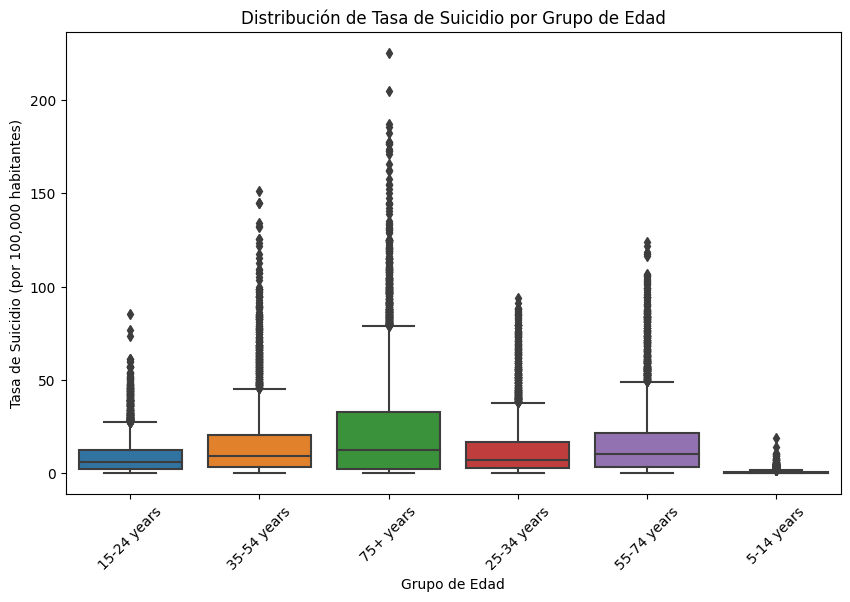

In [ ]:
# Crear un diagrama de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='suicides/100k pop', data=datos)
plt.title('Distribución de Tasa de Suicidio por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Tasa de Suicidio (por 100,000 habitantes)')
plt.xticks(rotation=45)
plt.show()


#Histogramas para Datos Numéricos:
- Para las columnas como "suicides_no," "population," "suicides/100k pop," "HDI for year," "gdp_per_capita ($)," puedes crear histogramas para visualizar la distribución de valores numéricos.

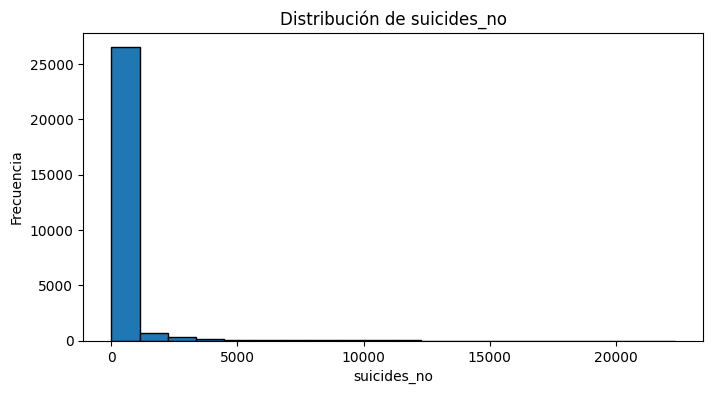

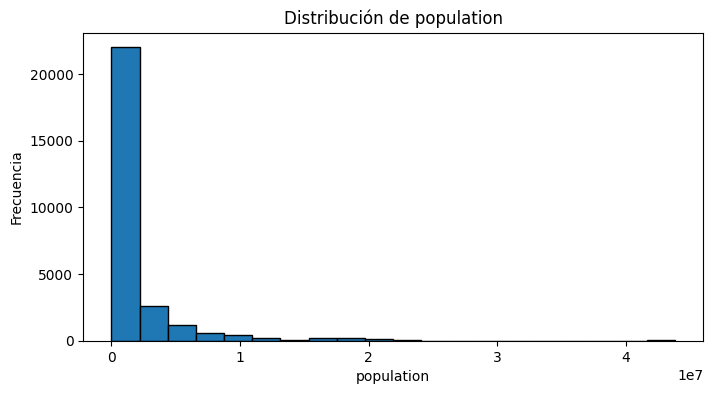

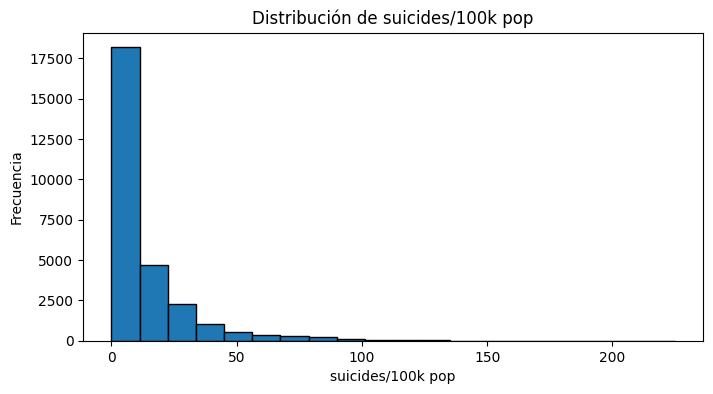

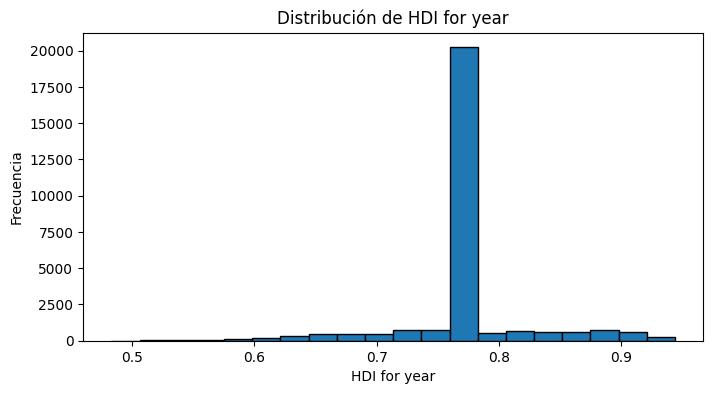

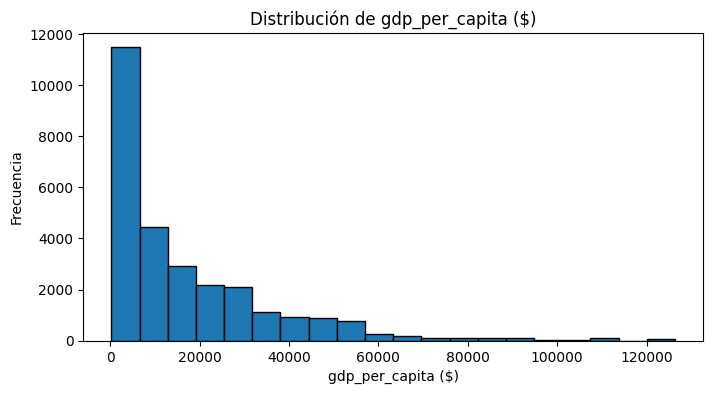

In [ ]:
import matplotlib.pyplot as plt

# Suponiendo que las columnas numéricas son 'suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)'
num_cols = ['suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)']

# Crear histogramas para cada columna numérica
for col in num_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(datos[col], bins=20, edgecolor='k')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


#Gráficos de Barras o Categóricos para Datos Categóricos:
- Para las columnas "country," "year," "sex," "age," "country-year," y "generation," puedes utilizar gráficos de barras para mostrar la distribución de categorías.

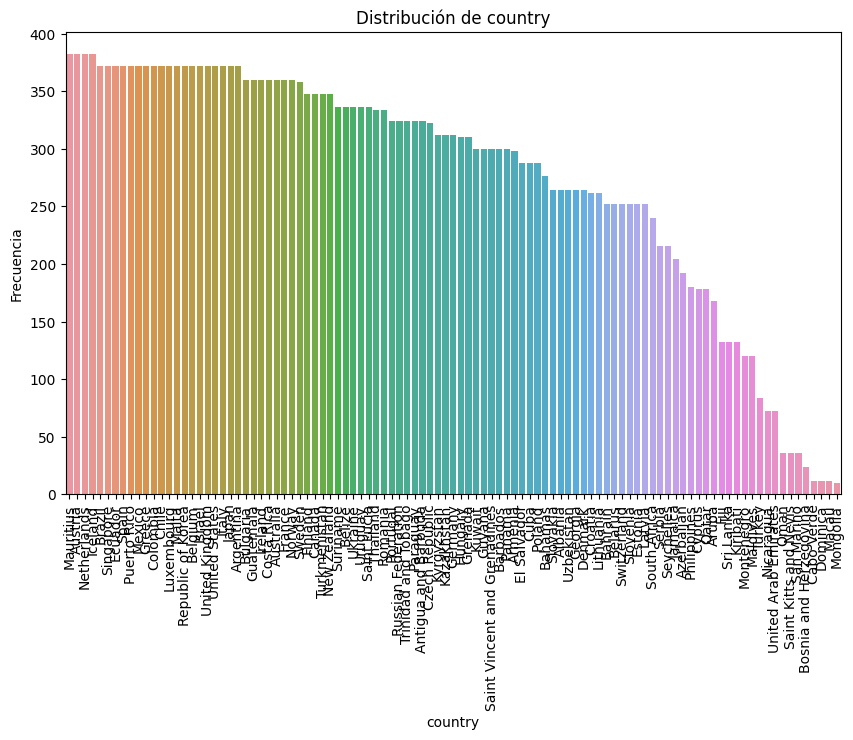

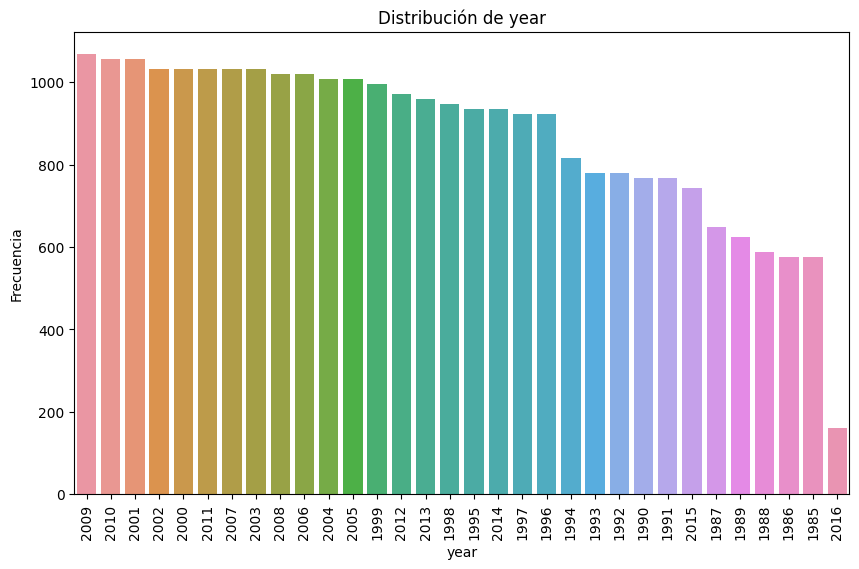

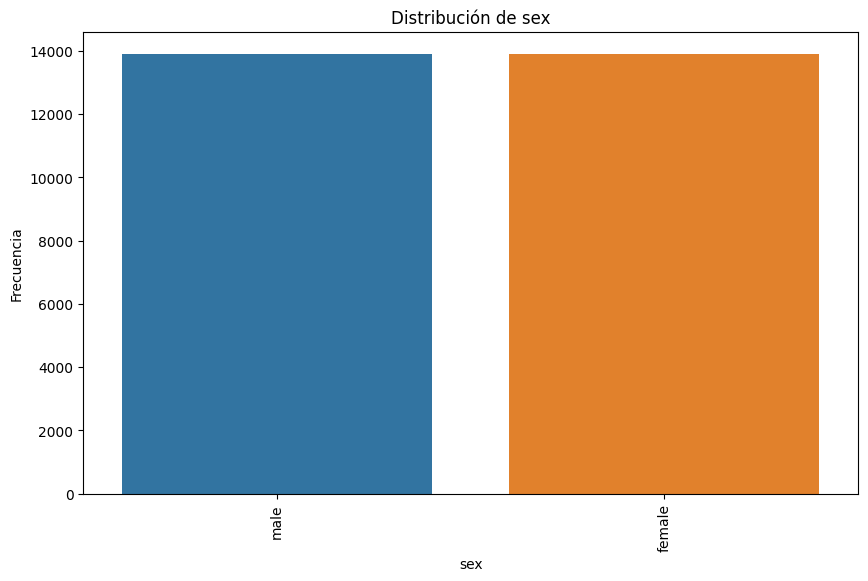

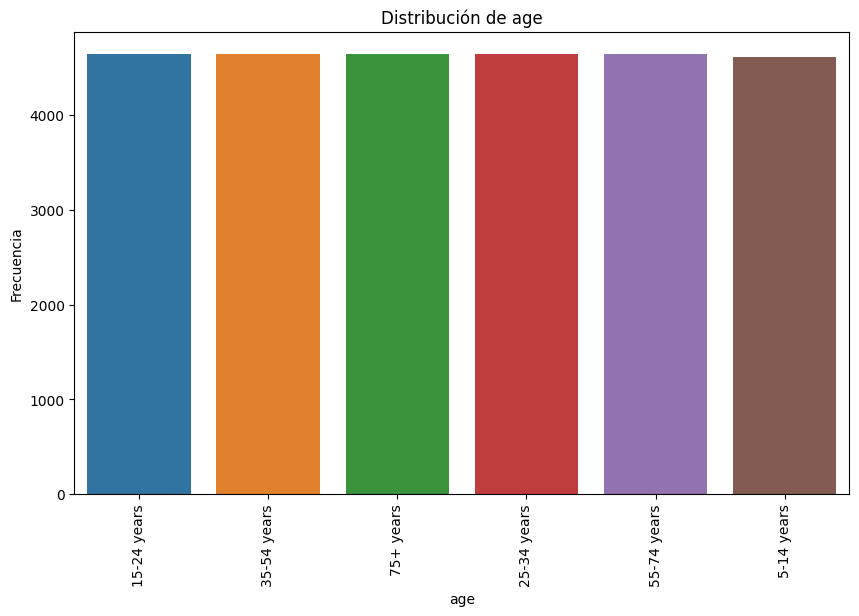

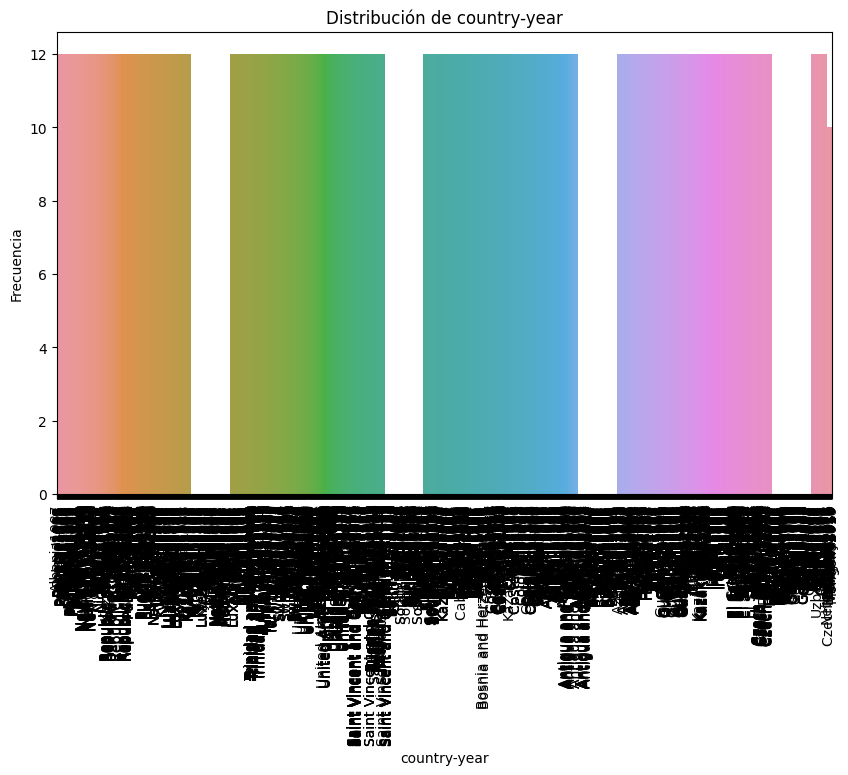

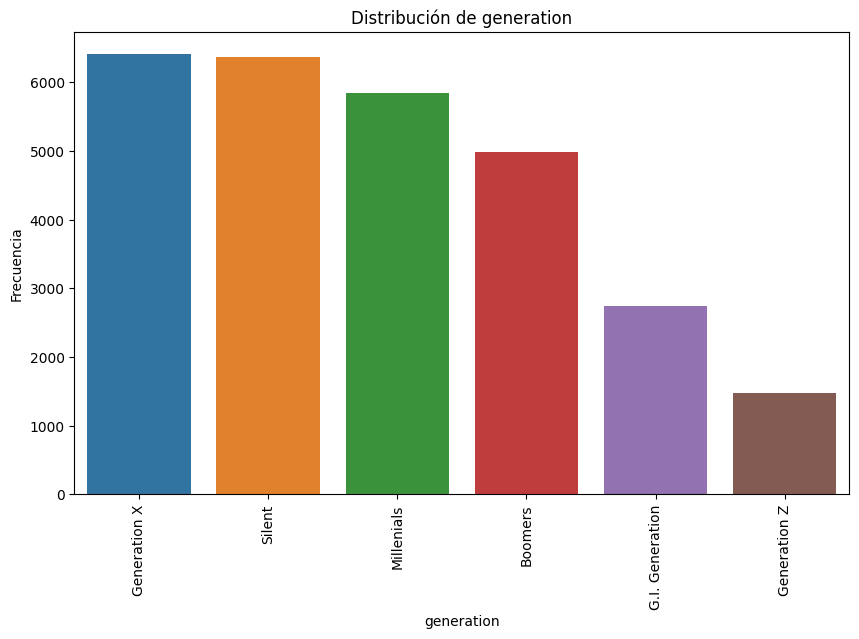

In [ ]:
import seaborn as sns

# Suponiendo que las columnas categóricas son 'country', 'year', 'sex', 'age', 'country-year', 'generation'
cat_cols = ['country', 'year', 'sex', 'age', 'country-year', 'generation']

# Crear gráficos de barras para cada columna categórica
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=datos, x=col, order=datos[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Frecuencia')
    plt.show()


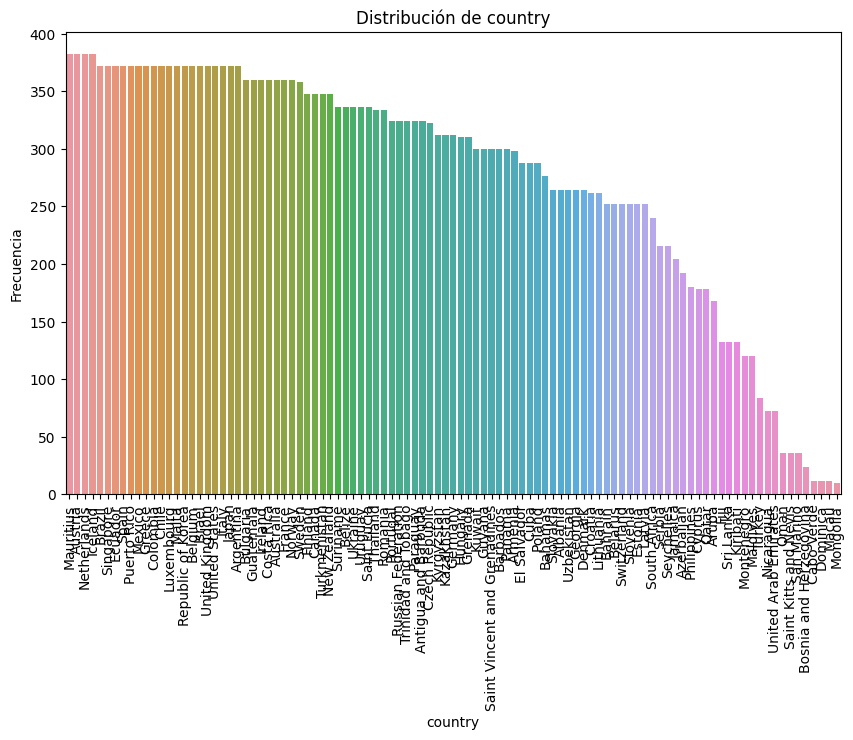

country: El gráfico de barras muestra la distribución de los países en el conjunto de datos. Puedes ver cuántos registros provienen de cada país. Esto es útil para entender qué países están representados y si hay un desequilibrio en la cantidad de datos de cada país.


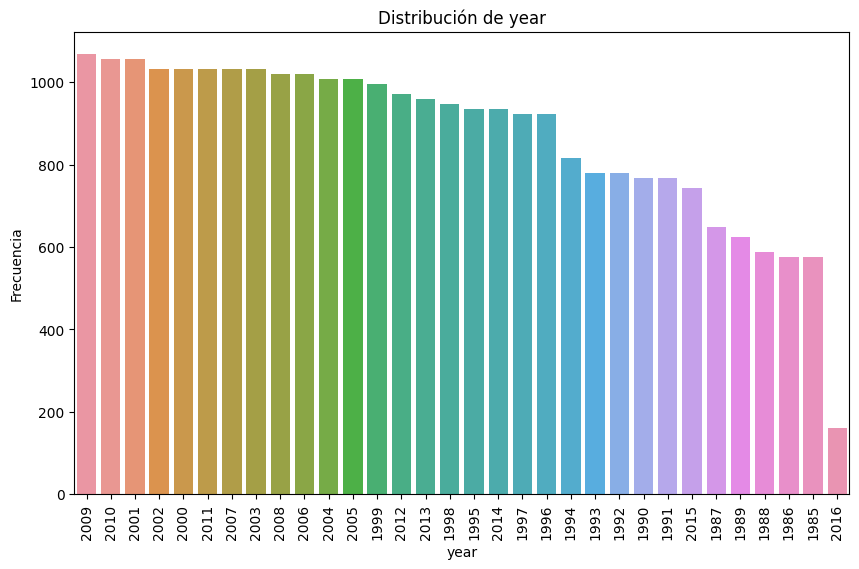

year: El gráfico de barras muestra cuántos registros corresponden a cada año en el conjunto de datos. Te permite ver cómo están distribuidos los datos a lo largo del tiempo.


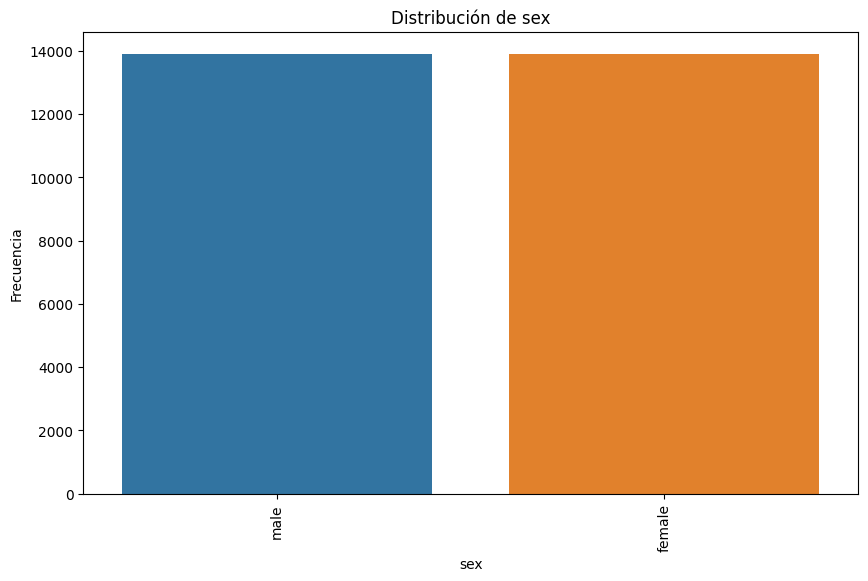

sex: Este gráfico de barras muestra la distribución de género en los datos. Puedes ver cuántos registros corresponden a cada género, lo que es esencial para comprender la proporción de género en el conjunto de datos.


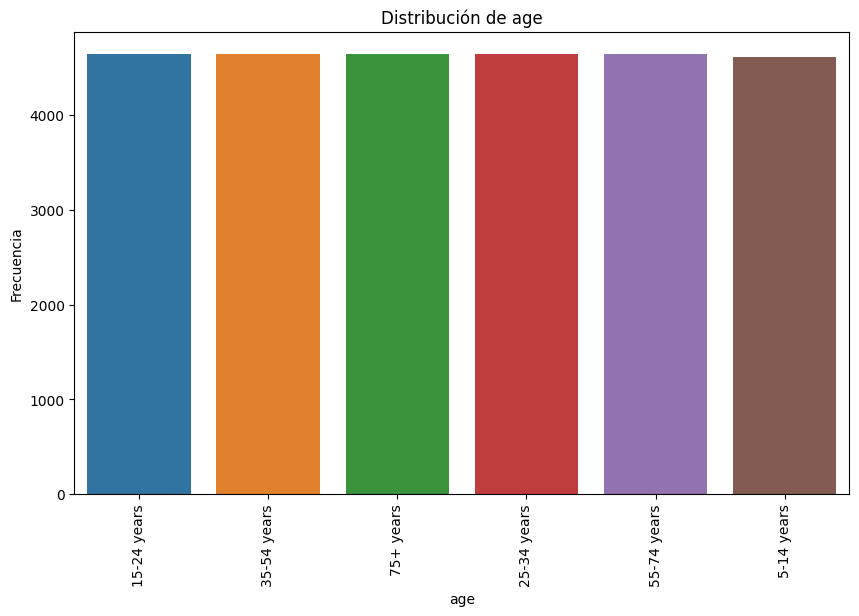

age: El gráfico de barras representa la distribución de diferentes grupos de edad en el conjunto de datos. Ayuda a comprender cómo se dividen las edades de las personas en los registros.


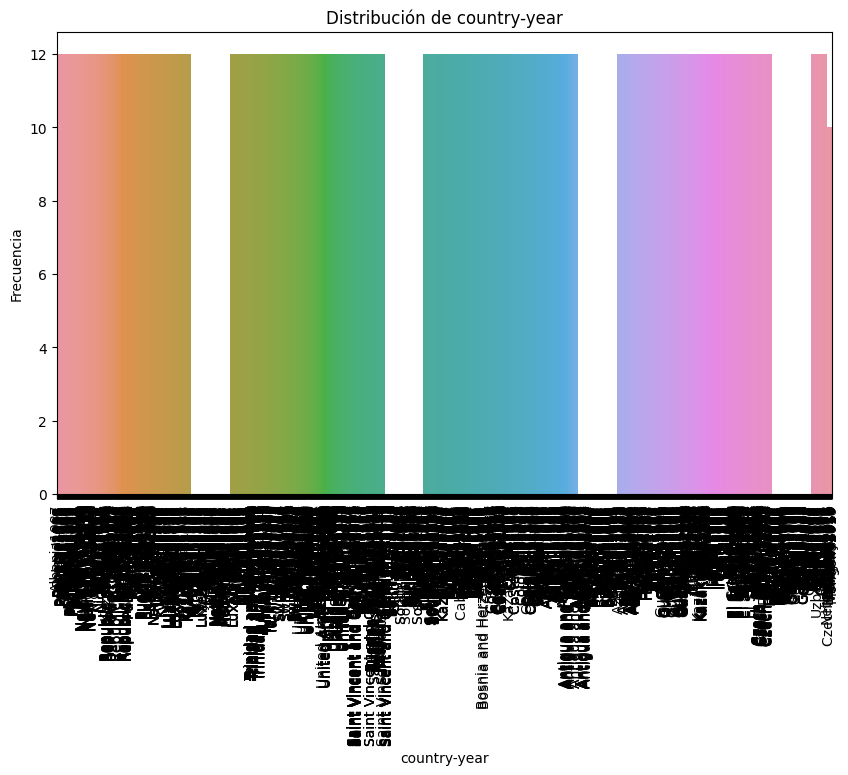

country-year: Este gráfico de barras muestra la distribución de las combinaciones de país y año. Puede ayudar a identificar si ciertas combinaciones están sobre o subrepresentadas.


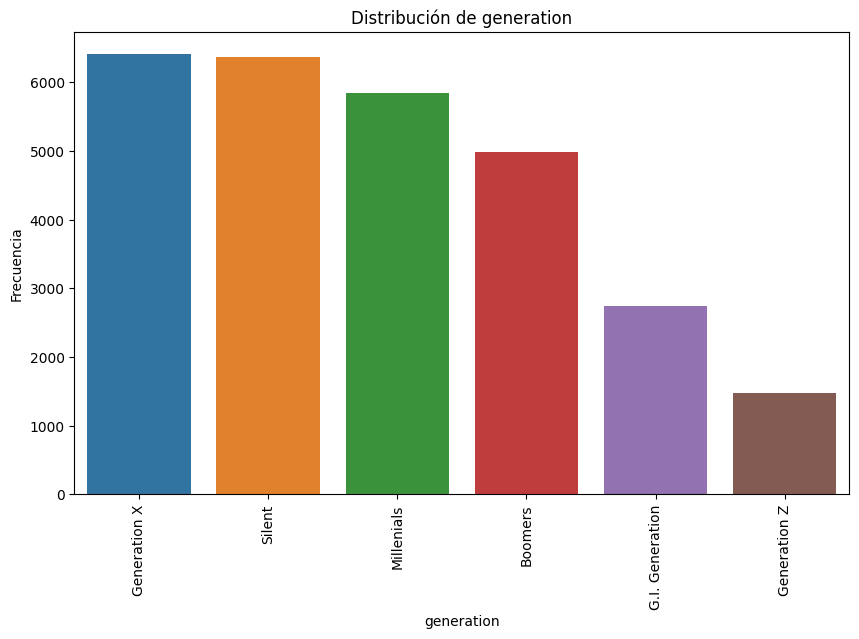

generation: El gráfico de barras muestra la distribución de las generaciones en los registros. Puedes ver cuántos registros pertenecen a cada generación.


In [ ]:
import seaborn as sns

# Suponiendo que las columnas categóricas son 'country', 'year', 'sex', 'age', 'country-year', 'generation'
cat_cols = ['country', 'year', 'sex', 'age', 'country-year', 'generation']

# Crear gráficos de barras para cada columna categórica
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=datos, x=col, order=datos[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Frecuencia')
    plt.show()

    # Explicación para cada gráfico
    if col == 'country':
        print(f"{col}: El gráfico de barras muestra la distribución de los países en el conjunto de datos. Puedes ver cuántos registros provienen de cada país. Esto es útil para entender qué países están representados y si hay un desequilibrio en la cantidad de datos de cada país.")
    elif col == 'year':
        print(f"{col}: El gráfico de barras muestra cuántos registros corresponden a cada año en el conjunto de datos. Te permite ver cómo están distribuidos los datos a lo largo del tiempo.")
    elif col == 'sex':
        print(f"{col}: Este gráfico de barras muestra la distribución de género en los datos. Puedes ver cuántos registros corresponden a cada género, lo que es esencial para comprender la proporción de género en el conjunto de datos.")
    elif col == 'age':
        print(f"{col}: El gráfico de barras representa la distribución de diferentes grupos de edad en el conjunto de datos. Ayuda a comprender cómo se dividen las edades de las personas en los registros.")
    elif col == 'country-year':
        print(f"{col}: Este gráfico de barras muestra la distribución de las combinaciones de país y año. Puede ayudar a identificar si ciertas combinaciones están sobre o subrepresentadas.")
    elif col == 'generation':
        print(f"{col}: El gráfico de barras muestra la distribución de las generaciones en los registros. Puedes ver cuántos registros pertenecen a cada generación.")


#Conclusiones

Aquí están algunas conclusiones basadas en el EDA (Análisis Exploratorio de Datos) realizado en el conjunto de datos de tasas de suicidio de 1985 a 2016:

**Descripción del Conjunto de Datos:**
- El conjunto de datos contiene información sobre tasas de suicidio en diferentes países, desglosada por año, género, grupos de edad y más.
- Hay un total de 12 columnas que incluyen datos demográficos y económicos, como el Índice de Desarrollo Humano (HDI) y el Producto Interno Bruto (PIB) per cápita.
- Uno de los aspectos a destacar es que la columna "HDI for year" tiene una gran cantidad de valores faltantes (aproximadamente 19,456 registros sin valor en esta columna).

**Valores Faltantes:**
- Los valores faltantes se identificaron en la columna "HDI for year". Para abordar este problema, se utilizó la estrategia de imputación, llenando los valores faltantes con la mediana de la columna. Esto se hizo para garantizar que los datos estén listos para su análisis posterior.

**Análisis de Datos:**
- Se realizaron varias visualizaciones, incluyendo un gráfico de dispersión que muestra la relación entre el PIB per cápita y la tasa de suicidio. No se encontró una relación lineal clara entre estas dos variables.
- Otro gráfico de dispersión analizó la relación entre la tasa de suicidio y el Índice de Desarrollo Humano (HDI). Nuevamente, no se identificó una correlación lineal fuerte.
- Se utilizó un diagrama de caja para analizar la distribución de la tasa de suicidio por grupos de edad. Se observaron diferencias en las tasas de suicidio entre los grupos de edad, y se identificaron valores atípicos en algunos grupos.
- Se crearon histogramas para explorar la distribución de las variables numéricas, como "suicides_no," "population," "suicides/100k pop," "HDI for year," y "gdp_per_capita ($)". Esto permitió observar la variabilidad y la forma de estas distribuciones.

**Enfoque para la Elección del Modelo:**
- Para abordar la elección del modelo, es importante considerar que se trata de una tarea de clasificación. El objetivo es predecir la tasa de suicidio o clasificar las observaciones en diferentes categorías relacionadas con las tasas de suicidio.
- Dado que el conjunto de datos contiene una variedad de características, desde datos demográficos hasta indicadores económicos, es recomendable explorar enfoques de modelado que puedan capturar relaciones no lineales y complejas. Modelos como Random Forest y Gradient Boosting pueden ser opciones sólidas, ya que son capaces de manejar desequilibrios en los datos y aprender relaciones no lineales.
- Además, debido al desequilibrio de clases, se deben considerar técnicas como el sobremuestreo (oversampling) o el submuestreo (undersampling) de las clases minoritarias para garantizar que el modelo se entrena adecuadamente en todas las clases.
- La elección del modelo final dependerá de la evaluación del rendimiento a través de métricas adecuadas, como la precisión, la recuperación (recall), la F1-score y la matriz de confusión, teniendo en cuenta los objetivos específicos del proyecto.

El análisis exploratorio de datos proporciona una visión general de la estructura y las características del conjunto de datos. Para la elección del modelo, se deben considerar enfoques de clasificación capaces de manejar la complejidad de los datos y técnicas para abordar el desequilibrio de clases. La evaluación del rendimiento será fundamental para seleccionar el modelo más adecuado.

#problemas, problemas
El error que estás experimentando se debe a que estás intentando aplicar el método .str en una columna que ya es de tipo numérico y no contiene valores de tipo cadena (string).

Para solucionar esto, asegúrate de que las columnas que deseas convertir de cadena a tipo flotante (float) sean, de hecho, cadenas. Puedes hacer una comprobación previa antes de realizar la conversión. Aquí tienes una forma de hacerlo:
El error que estás experimentando se debe a que la columna "gdp_for_year ($)" no existe en tu conjunto de datos. Puedes verificar el nombre de las columnas disponibles en tus datos para asegurarte de que la columna se llama de la manera correcta.

Dado que no encuentro una columna con ese nombre en los datos que proporcionaste, te recomendaría revisar nuevamente el conjunto de datos o la fuente de datos y asegurarte de que estás utilizando el nombre correcto de la columna que deseas convertir y escalar.

Asegúrate de que la columna realmente exista en tus datos antes de intentar acceder a ella. Puedes verificar las columnas disponibles en tus datos utilizando:

In [ ]:
#Primeras filas del conjunto de datos
datos.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,0,2,1,0,21,312900,6.71,0,NaN,"2,156,624,900",796,2
1,0,2,1,2,16,308000,5.19,0,NaN,"2,156,624,900",796,5
2,0,2,0,0,14,289700,4.83,0,NaN,"2,156,624,900",796,2
3,0,2,1,5,1,21800,4.59,0,NaN,"2,156,624,900",796,1
4,0,2,1,1,9,274300,3.28,0,NaN,"2,156,624,900",796,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Lista de columnas categóricas
categorical_cols = ['country', 'year', 'sex', 'age', 'country-year', 'generation']

# Inicializar un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar Label Encoding a las columnas categóricas
for col in categorical_cols:
    datos[col] = label_encoder.fit_transform(datos[col])

# Visualizar los datos transformados
print(datos.head())


   country  year  sex  age  suicides_no  population  suicides/100k pop  \
0        0     2    1    0           21      312900               6.71   
1        0     2    1    2           16      308000               5.19   
2        0     2    0    0           14      289700               4.83   
3        0     2    1    5            1       21800               4.59   
4        0     2    1    1            9      274300               3.28   

   country-year  HDI for year  gdp_for_year ($)   gdp_per_capita ($)  \
0             0           NaN      2,156,624,900                 796   
1             0           NaN      2,156,624,900                 796   
2             0           NaN      2,156,624,900                 796   
3             0           NaN      2,156,624,900                 796   
4             0           NaN      2,156,624,900                 796   

   generation  
0           2  
1           5  
2           2  
3           1  
4           0  


In [ ]:
from sklearn.impute import SimpleImputer

# Crear un imputador
imputer = SimpleImputer(strategy='mean')  # Puedes ajustar la estrategia según tu preferencia

# Aplicar la imputación a los datos de entrenamiento
X_train = imputer.fit_transform(X_train)


In [ ]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Asegúrate de que las etiquetas coincidan


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos preprocesado
datos = pd.read_csv('master.csv')

# Eliminar las comas de la columna 'gdp_for_year ($)' y convertirla a valores numéricos
datos[' gdp_for_year ($) '] = datos[' gdp_for_year ($) '].str.replace(',', '').astype(float)

# Aplicar One-Hot Encoding a las columnas categóricas
categorical_cols = ['country', 'year', 'sex', 'age', 'country-year', 'generation']
datos = pd.get_dummies(datos, columns=categorical_cols)

# Seleccionar las características (variables predictoras) y la variable objetivo (tasa de suicidio)
features = datos.drop(['suicides/100k pop'], axis=1)
target = datos['suicides/100k pop']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo (métricas)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Imprimir las métricas de desempeño
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(confusion)


ValueError: ignored

In [ ]:
print(datos.columns)


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


#Distribución del conjunto de datos
Exploración de variables categóricas: Las variables categóricas como "sex", "age" y "generation" son importantes para analizar. Puedes contar los valores únicos en estas columnas para comprender las categorías presentes.

In [ ]:
print(df['sex'].value_counts())
print(df['age'].value_counts())
print(df['generation'].value_counts())


NameError: ignored

**Análisis estadístico:**

Análisis más detallado de las variables numéricas utilizando estadísticas descriptivas. Por ejemplo, puedes calcular promedios, desviaciones estándar, máximos y mínimos para "suicides_no" y "suicides/100k pop".

In [ ]:
datos[['suicides_no', 'suicides/100k pop']].describe()


,suicides_no,suicides/100k pop
count,27820.000000,27820.000000
mean,242.574407,12.816097
std,902.047917,18.961511
min,0.000000,0.000000
25%,3.000000,0.920000
50%,25.000000,5.990000
75%,131.000000,16.620000
max,22338.000000,224.970000


**Visualización de datos:**

Utiliza gráficos y visualizaciones para obtener una comprensión más profunda de los datos. Por ejemplo, puedes crear gráficos de barras, histogramas o gráficos de dispersión para explorar relaciones entre variables.

In [ ]:
import matplotlib.pyplot as plt

# Ejemplo de un gráfico de barras para contar suicidios por género
df['sex'].value_counts().plot(kind='bar')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de suicidios')
plt.title('Suicidios por género')
plt.show()


NameError: ignored

In [ ]:
print(df['sex'].value_counts())
print(df['age'].value_counts())
print(df['generation'].value_counts())


NameError: ignored

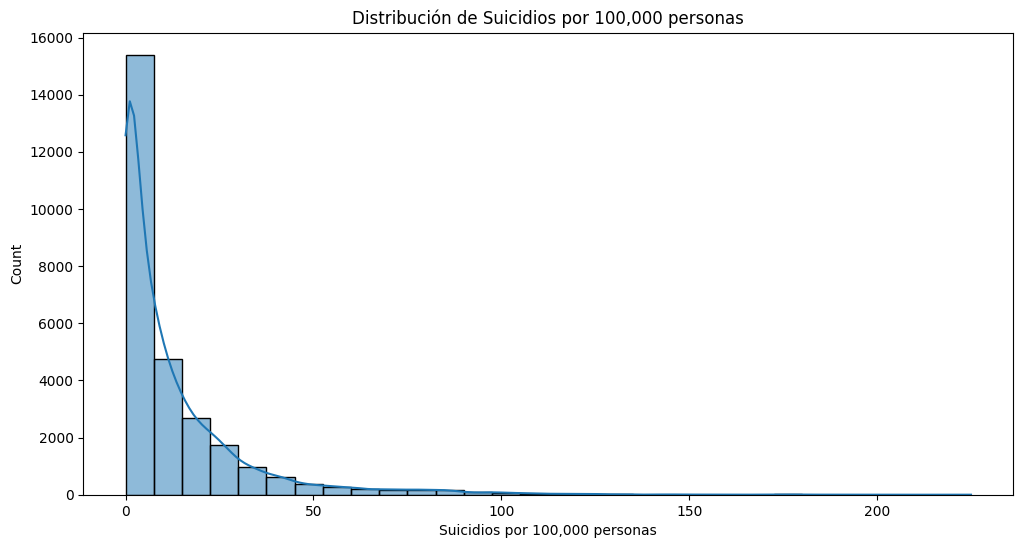

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar un histograma de la variable "suicides/100k pop"
plt.figure(figsize=(12, 6))
sns.histplot(datos['suicides/100k pop'], bins=30, kde=True)
plt.title('Distribución de Suicidios por 100,000 personas')
plt.xlabel('Suicidios por 100,000 personas')

plt.show()


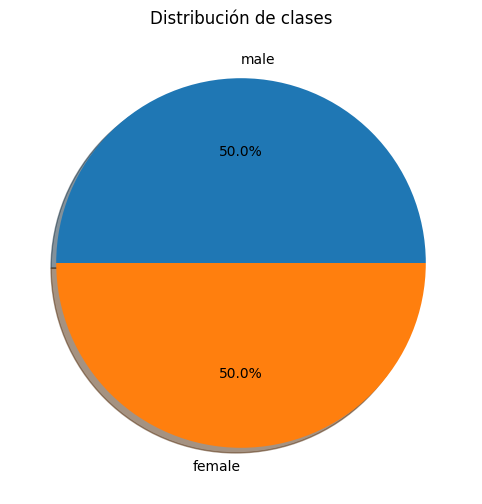

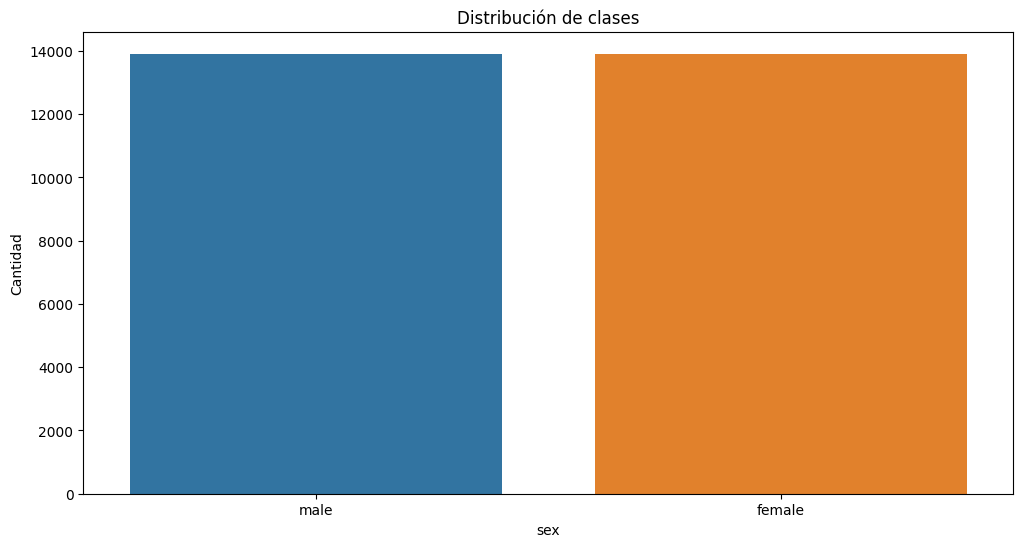

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que 'datos' es tu DataFrame con los datos
# Asegúrate de usar el nombre correcto de la columna que deseas analizar

# Graficar un gráfico de pastel de las clases
plt.figure(figsize=(12, 6))
datos['sex'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Distribución de clases')
plt.ylabel('')

# Graficar un gráfico de barras de las clases
plt.figure(figsize=(12, 6))
sns.countplot(x='sex', data=datos)
plt.title('Distribución de clases')
plt.xlabel('sex')
plt.ylabel('Cantidad')

plt.show()


# Exploración del conjunto de datos



In [ ]:
# Crear DataFrame booleano indicando valores faltantes
valores_faltantes = datos.isnull()

# Obtener la cantidad total de valores faltantes por columna
cantidad_faltantes = valores_faltantes.sum()
cantidad_faltantes

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

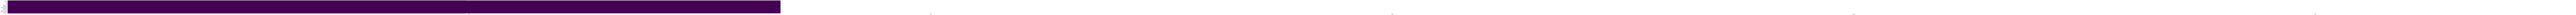

In [ ]:
import matplotlib.pyplot as plt
ax = plt.figure(figsize=(650,325)).add_subplot(111)
ax.imshow(datos.isna().values.T, cmap='viridis')
ax.set_aspect(12)
plt.yticks(range(datos.shape[1]), datos.columns);
#DAR CLIC EN LA BARRA GRÁFICA PARA AMPLIARLA Y OBSERVAR LA DISTRIBUCIÓN  DE VALORES VACÍOS POR CATEGORÍA

In [ ]:
#Exploración básica de los datos
datos._get_numeric_data().describe().T

#Matriz de Correlación
Para generar un mapa de calor que muestre la correlación entre todas las variables del conjunto de datos, se utilizara la función seaborn.heatmap(). Esta función permitirá visualizar las relaciones entre cada par de variables y descubrir posibles interacciones dentro de los datos. El conjunto de datos que se va a utilizar se llama main_data_index_set.

<ipython-input-38-8beb6fe5402f>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = datos.corr()


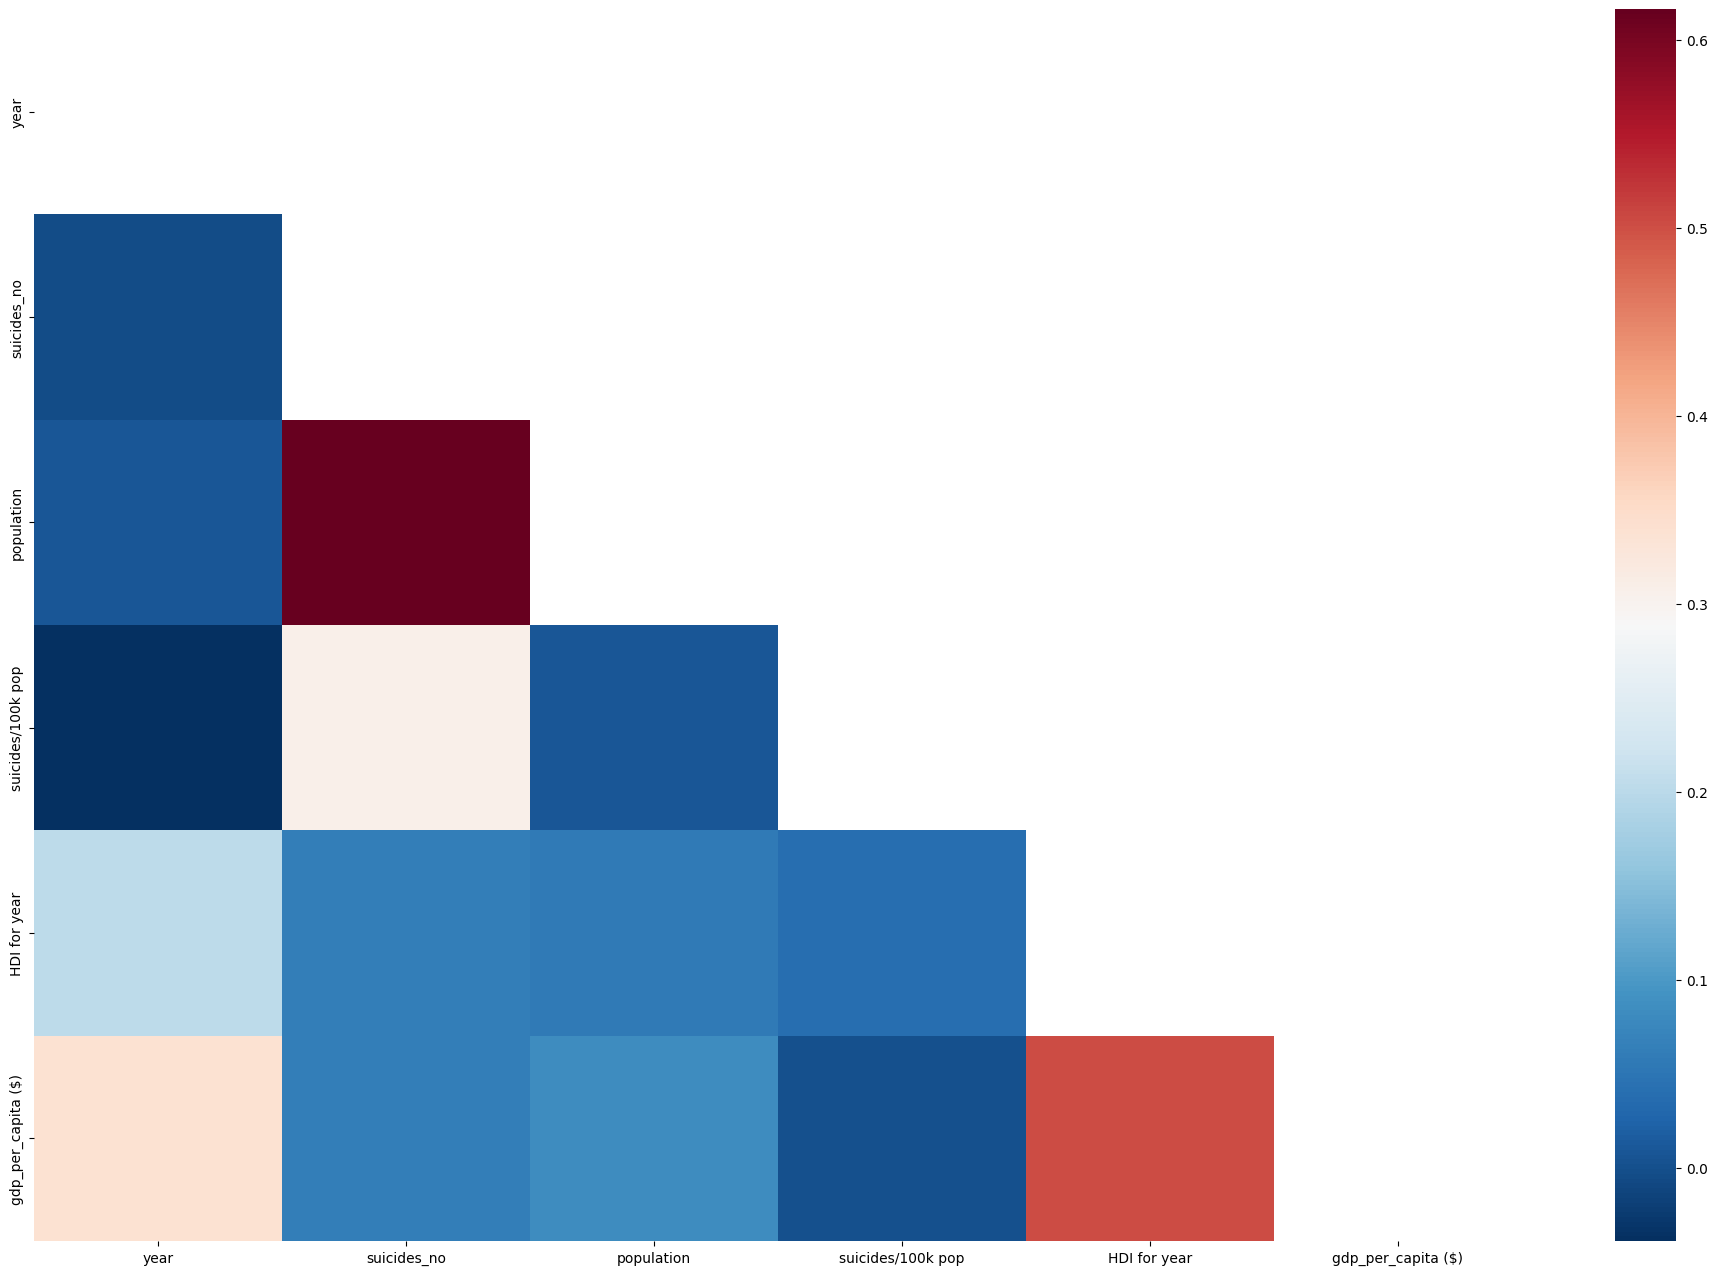

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Producir una matriz de correlación de los datos - luego, crear una máscara para ocultar la mitad superior derecha de la matriz.
corrs = datos.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True

# Convertir la matriz de correlación en un mapa de calor usando Seaborn.
plt.figure(figsize=(24,16))
sns.heatmap(corrs, cmap='RdBu_r', mask=mask)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Lista de columnas categóricas
categorical_cols = ['country', 'year', 'sex', 'age', 'country-year', 'generation']

# Inicializar un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar Label Encoding a las columnas categóricas
for col in categorical_cols:
    datos[col] = label_encoder.fit_transform(datos[col])

# Visualizar los datos transformados
print(datos.head())


   country  year  sex  age  suicides_no  population  suicides/100k pop  \
0        0     2    1    0           21      312900               6.71   
1        0     2    1    2           16      308000               5.19   
2        0     2    0    0           14      289700               4.83   
3        0     2    1    5            1       21800               4.59   
4        0     2    1    1            9      274300               3.28   

   country-year  HDI for year  gdp_for_year ($)   gdp_per_capita ($)  \
0             0           NaN      2,156,624,900                 796   
1             0           NaN      2,156,624,900                 796   
2             0           NaN      2,156,624,900                 796   
3             0           NaN      2,156,624,900                 796   
4             0           NaN      2,156,624,900                 796   

   generation  
0           2  
1           5  
2           2  
3           1  
4           0  


#Primer modelo ejecutado.

Para iniciar con un intento de predicción se divide el conjunto de datos en 'train' y 'test'.

Después se llenan los valores faltantes con la moda si se trata de variables categóricas y la mediana si se trata de variables numéricas.

Finalmente se aplica el ajuste de una regresión logística y se calcula el accuracy obteniendo un resultado en ella de aproximadamente 33%

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos preprocesado
datos = pd.read_csv('master.csv')

# Identificar las columnas que deben ser convertidas a tipo float
columns_to_convert = ['population', 'gdp_for_year ($)', 'gdp_per_capita ($)']

# Convertir solo las columnas que son de tipo cadena a tipo float
for col in columns_to_convert:
    if datos[col].dtype == 'object':
        datos[col] = datos[col].str.replace(',', '').astype(float)

# Inicializar un objeto LabelEncoder
label_encoder = LabelEncoder()

# Codificar las variables categóricas
categorical_cols = ['country', 'sex', 'age', 'country-year', 'generation']
for col in categorical_cols:
    datos[col] = label_encoder.fit_transform(datos[col])

# Seleccionar las características (variables predictoras) y la variable objetivo (tasa de suicidio)
features = datos.drop(['suicides/100k pop'], axis=1)
target = datos['suicides/100k pop']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Escalar las características numéricas para el modelo
scaler = StandardScaler()
X_train[columns_to_convert] = scaler.fit_transform(X_train[columns_to_convert])
X_test[columns_to_convert] = scaler.transform(X_test[columns_to_convert])

# Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo (métricas)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Imprimir las métricas de desempeño
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(confusion)


KeyError: ignored